# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

Done

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing
!pip install kaggle ## added
!pip install bokeh==2.0.1 ## added


  Using cached setuptools-69.0.3-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-69.0.3-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.2.2
    Uninstalling setuptools-68.2.2:
      Successfully uninstalled setuptools-68.2.2
  Using cached mxnet-1.9.1-py3-none-manylinux2014_aarch64.whl (35.8 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (62 kB)
  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_aarch64.whl.metadata (9.7 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (14.2 MB)
Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_aarch64.whl (4.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.6 MB/s eta 0:00:00a 0:00:0

In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

train = pd.read_csv('data/train.csv')  
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
df_train_col_clean = train.drop(['casual', 'registered'], axis=1)

# df_train_col_clean.head()

predictor = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_col_clean,
    presets="best_quality",
    time_limit=600 #seconds
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240119_152822"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240119_152822/ds_sub_fit/sub_fit_ho.
2024-01-19 15:28:23,117	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning AutoGluon training ... Time limit =

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -50.242177  root_mean_squared_error       8.532535  340.059044                0.000226           0.260587            3       True         28
1        NeuralNetFastAI_BAG_L2  -51.372715  root_mean_squared_error       7.754836  285.813953                0.096291          14.626734            2       True         23
2        RandomForestMSE_BAG_L2  -53.192805  root_mean_squared_error       7.991142  279.606899                0.332597           8.419681            2       True         20
3          ExtraTreesMSE_BAG_L2  -54.134205  root_mean_squared_error       7.992780  273.236581                0.334235           2.049363            2       True         22
4                XGBoost_BAG_L2  -54.744985  root_mean_squared_error

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleMode

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()


0    25.344101
1    42.491913
2    47.053406
3    48.525951
4    51.224342
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.684547
std        88.138229
min         3.197534
25%        22.553762
50%        67.985252
75%       168.104568
max       355.477295
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [17]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"


100%|████████████████████████████████████████| 188k/188k [00:05<00:00, 33.4kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-01-19 15:40:37  first raw submission  complete  1.75994      1.75994       


#### Initial score of `1.75994`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

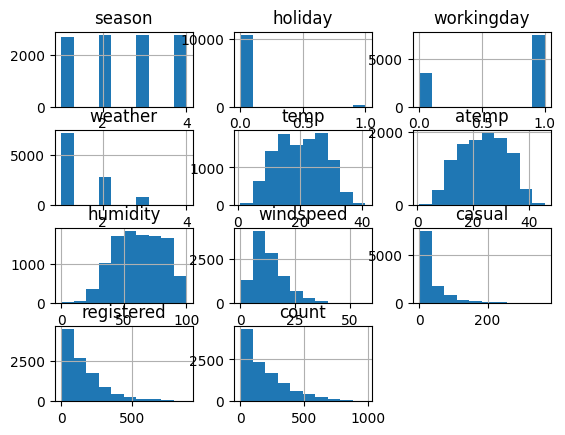

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [23]:
# create a new feature
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
test['hour'] = pd.to_datetime(test['datetime']).dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["season"].astype("category")

In [25]:
# View are new feature
train.head()
#train.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

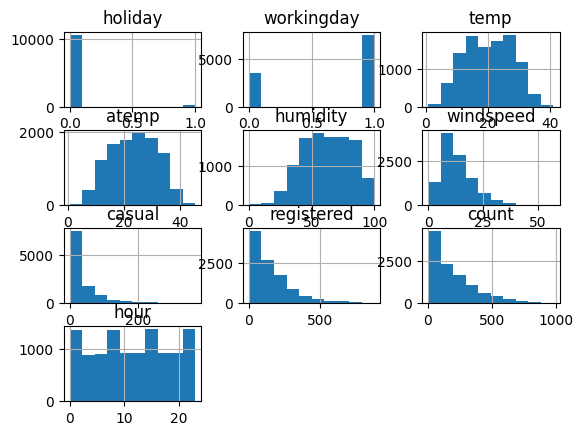

In [26]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [27]:
df_train_new_features_col_clean = train.drop(['casual', 'registered'], axis=1)

# df_train_col_clean.head()

predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error').fit(
    train_data=df_train_new_features_col_clean,
    presets="best_quality",
    time_limit=600 #seconds
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240119_154308"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240119_154308/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 165 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 435 seconds.
Starting full fit now with num_stack_leve

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.278765  root_mean_squared_error      10.053229  350.305302                0.000227           0.235412            3       True         23
1   NeuralNetFastAI_BAG_L2  -29.526860  root_mean_squared_error       9.647811  293.466651                0.237761          16.046664            2       True         18
2          LightGBM_BAG_L2  -30.396712  root_mean_squared_error       9.584702  280.533184                0.174653           3.113196            2       True         14
3          CatBoost_BAG_L2  -30.475431  root_mean_squared_error       9.474649  325.746205                0.064599          48.326217            2       True         16
4     CatBoost_r177_BAG_L2  -30.657927  root_mean_squared_error       9.475903  282.766390   

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [29]:
predictions_new_features = predictor_new_features.predict(test)
# predictions_new_features.head()

# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [30]:
submission_new_features = submission.copy()

# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 188k/188k [00:03<00:00, 58.4kB/s]
Successfully submitted to Bike Sharing Demand

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-01-19 15:57:45  new features          complete  0.7775       0.7775        
submission.csv               2024-01-19 15:40:37  first raw submission  complete  1.75994      1.75994       


#### New Score of `0.7775`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

### Use the eval_metric='root_mean_squared_log_error'
Set the eval metric as RSMLE and problem type as regression

In [33]:
predictor_new_features_regr_rmsle = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_log_error').fit(
    train_data=df_train_new_features_col_clean,
    presets="best_quality",
    time_limit=600 #seconds
)
predictions_new_features_regr_rmsle = predictor_new_features_regr_rmsle.predict(test)
# predictions_new_features.head()

# Remember to set all negative values to zero
predictions_new_features_regr_rmsle[predictions_new_featuresregr_rmsle<0] = 0
submission_new_features_regr_rmsle = submission.copy()

# Same submitting predictions
submission_new_features_regr_rmsle["count"] = predictions_new_features
submission_new_features_regr_rmsle.to_csv("submission_new_features_regr_rmsle.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_regr_rmsle.csv -m "new features rmsle"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Fitted model: NeuralNetTorch/01798f65 ...
	-56.1498	 = Validation score   (-root_mean_squared_error)
	5.04s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/1b256259 ...
	-48.105	 = Validation score   (-root_mean_squared_error)
	12.17s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/080e6eba ...
	-96.8869	 = Validation score   (-root_mean_squared_error)
	7.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/d198460f ...
	-67.0072	 = Validation score   (-root_mean_squared_error)
	7.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/560d8ed6 ...
	-101.3847	 = Validation score   (-root_mean_squared_error)
	3.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1079.99s of the 10783.85s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/1b256259': 0.74, 'NeuralNetTorch/01798f65': 0.26}
	-46.8609

In [33]:
from autogluon.common import space

learning_rate = space.Real(1e-4, 1e-2, default=5e-4, log=True)
dropout_prob = space.Real(0.0, 0.5, default=0.1)
activation = space.Real('relu')

nn_fstai_options = {  
    'num_epochs': 30,  
    'learning_rate': learning_rate,
    'dropout_prob' : dropout_prob,
    'activation': activation,
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': 36,  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'FASTAI': nn_fstai_options, 
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for seconds
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'ASHA',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_log_error').fit(
    train_data=df_train_new_features_col_clean,
    time_limit=time_limit, #seconds
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)



Fitted model: NeuralNetTorch/01798f65 ...
	-56.1498	 = Validation score   (-root_mean_squared_error)
	5.04s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/1b256259 ...
	-48.105	 = Validation score   (-root_mean_squared_error)
	12.17s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/080e6eba ...
	-96.8869	 = Validation score   (-root_mean_squared_error)
	7.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/d198460f ...
	-67.0072	 = Validation score   (-root_mean_squared_error)
	7.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/560d8ed6 ...
	-101.3847	 = Validation score   (-root_mean_squared_error)
	3.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1079.99s of the 10783.85s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/1b256259': 0.74, 'NeuralNetTorch/01798f65': 0.26}
	-46.8609

In [34]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -46.860852  root_mean_squared_error       0.032511  17.257436                0.000176           0.048996            2       True          6
1  NeuralNetTorch/1b256259  -48.105030  root_mean_squared_error       0.016843  12.173367                0.016843          12.173367            1       True          2
2  NeuralNetTorch/01798f65  -56.149831  root_mean_squared_error       0.015493   5.035073                0.015493           5.035073            1       True          1
3  NeuralNetTorch/d198460f  -67.007225  root_mean_squared_error       0.007833   7.582775                0.007833           7.582775            1       True          4
4  NeuralNetTorch/080e6eba  -96.886928  root_mean_squared_error       0.008053   7.830877         

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch/01798f65': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/1b256259': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/080e6eba': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/d198460f': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/560d8ed6': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch/01798f65': -56.149830622070716,
  'NeuralNetTorch/1b256259': -48.10502959295009,
  'NeuralNetTorch/080e6eba': -96.88692843873233,
  'NeuralNetTorch/d198460f': -67.00722462816684,
  'NeuralNetTorch/560d8ed6': -101.38466703613905,
  'WeightedEnsemble_L2': -46.860852480062476},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetTorch/01798f65': ['NeuralNetTorch', '01798f65'],
  'NeuralNetTorch/1b256259': ['NeuralNetTorch', '1b256259'],
  'NeuralNetTorch/080e6eba': ['NeuralNetTorch', '080e6eba'],
  'NeuralNetTorch/d198460f': ['NeuralNetTorch', 'd198460f'],
  'NeuralNetTorch/560d8ed6'

In [37]:
predictions_new_features_new_hpo = predictor_new_hpo.predict(test)

# Remember to set all negative values to zero
predictions_new_features_new_hpo[predictions_new_features_new_hpo<0] = 0

In [39]:
submission_new_features_new_hpo = submission.copy()

# Same submitting predictions
submission_new_features_new_hpo["count"] = predictions_new_features_new_hpo
submission_new_features_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 190k/190k [00:00<00:00, 215kB/s]
Successfully submitted to Bike Sharing Demand

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-01-19 16:15:18  new features with hyperparameters  complete  1.31419      1.31419       
submission_new_features.csv  2024-01-19 15:57:45  new features                       complete  0.7775       0.7775        
submission.csv               2024-01-19 15:40:37  first raw submission               complete  1.75994      1.75994       


#### New Score of `1.31419`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

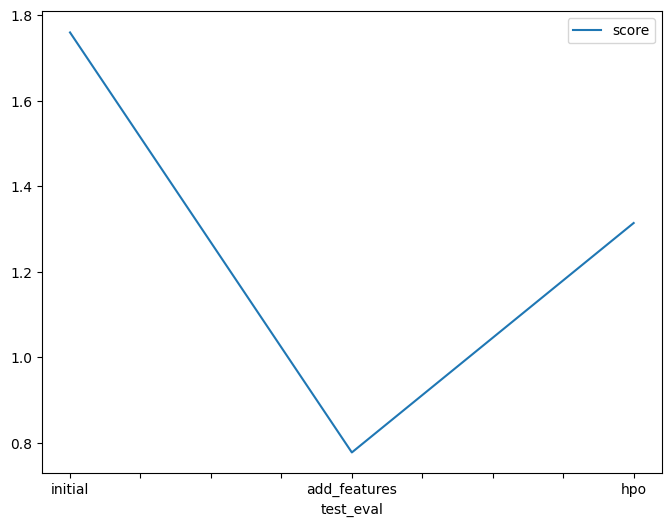

In [43]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.75994, 0.7775, 1.31419]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [44]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
 #   "hpo1": [?, ?, ?],
 #   "hpo2": [?, ?, ?],
 #   "hpo3": [?, ?, ?],
    "score": [1.75994, 0.7775, 1.31419]
})

,model,score
0,initial,1.75994
1,add_features,0.77750
2,hpo,1.31419
